# 8. Calling other programs

## C

Julia has a native interface for calling C functions via `ccall`:

In [1]:
ccall(("pow","libm"),Cdouble,(Cdouble,Cdouble),10.0,3.0)

1000.0

`ccall` takes the following arguments 
1. a (function, library) tuple
 * "libm" is the system math library
 * "pow" is the power function
2. the return type
 * Julia defines aliases for C types (in this case, `Cdouble` is an alias for `Float64`)
3. a tuple of the argument types
4. the argument values

This makes it very easy to interface with other software packages.

## R

RCall.jl provides an interface to R objects and functions.

In [2]:
using RCall

`rcall` is used to call R functions: the result is returned as an `RObject`, which is a Julia wrapper around an R object.

In [3]:
x = rcall(:sin,0:10)

RCall.RObject{RCall.RealSxp}
 [1]  0.0000000  0.8414710  0.9092974  0.1411200 -0.7568025 -0.9589243
 [7] -0.2794155  0.6569866  0.9893582  0.4121185 -0.5440211


This can be converted to a Julia object via `rcopy`:

In [4]:
rcopy(x)

11-element Array{Float64,1}:
  0.0     
  0.841471
  0.909297
  0.14112 
 -0.756802
 -0.958924
 -0.279415
  0.656987
  0.989358
  0.412118
 -0.544021

Most Julia objects can be passed as arguments, which are converted automatically to R objects (including functions).

Plots also (should) also work.

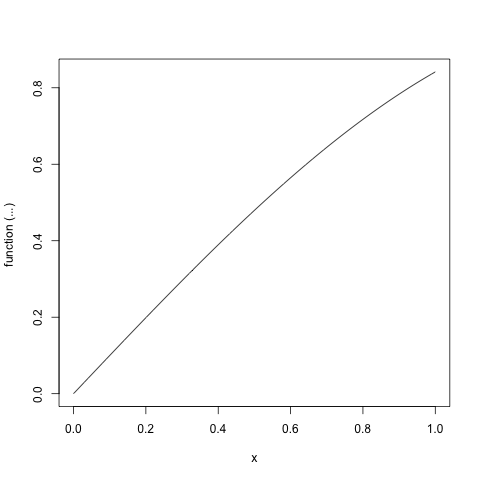

In [5]:
rcall(:plot, sin);

However you can get some odd behaviour due to R's nonstandard evaluation:

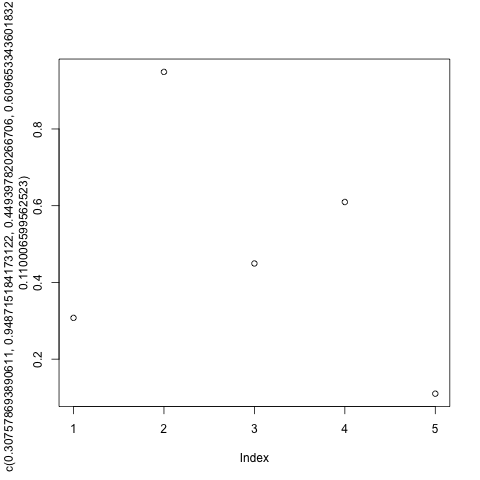

In [6]:
rcall(:plot,rand(5));

`reval` can be used to execute arbitrary R code:

In [7]:
reval("x <- rnorm(10)")

RCall.RObject{RCall.RealSxp}
 [1]  0.6825363  0.1834497 -0.3053057 -0.9927800 -1.7451910  1.5885996
 [7] -1.3973105  0.6703886 -1.7492102  0.4305654


## Other

There are similar interfaces to Python (PyCall.jl) and Matlab (MATLAB.jl). Also there is a highly experimental C++ interface (Cxx.jl) which allows inlining C++ code that is then JIT compiled on demand.